In [0]:
import urllib.request as urllib2
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
restaurant ="https://www.yelp.com/biz/antico-pizza-atlanta"

ratings =[]
reviews =[]
dates =[]
num_pages=10

for pgNum in range(0, 20*num_pages, 20):
    url = restaurant + '?start=' + str(pgNum)
    print('Scraping', url)
    page = urllib2.urlopen(url)
    soup = BeautifulSoup(page.read(), 'html.parser')

    for link in soup.find_all('meta'):
      if link.get('itemprop')=='ratingValue':
        ratings.append(float(link.get('content')))
      elif link.get('itemprop')=='datePublished':
        dates.append(link.get('content'))
    reviewText=str(soup).split('<p itemprop="description">')
    for i in range(1, len(reviewText)):
      text=reviewText[i].split('</p>')[0]
      reviews.append(text)
      
# Print 2 of the reviews and ratings
print(ratings[:2])
print(reviews[:2])

Scraping https://www.yelp.com/biz/antico-pizza-atlanta?start=0
Scraping https://www.yelp.com/biz/antico-pizza-atlanta?start=20
Scraping https://www.yelp.com/biz/antico-pizza-atlanta?start=40
Scraping https://www.yelp.com/biz/antico-pizza-atlanta?start=60
Scraping https://www.yelp.com/biz/antico-pizza-atlanta?start=80
Scraping https://www.yelp.com/biz/antico-pizza-atlanta?start=100
Scraping https://www.yelp.com/biz/antico-pizza-atlanta?start=120
Scraping https://www.yelp.com/biz/antico-pizza-atlanta?start=140
Scraping https://www.yelp.com/biz/antico-pizza-atlanta?start=160
Scraping https://www.yelp.com/biz/antico-pizza-atlanta?start=180
[4.0, 5.0]
["Antico is always an awesome experience; especially the Hemphill location. \n\nAuthentic pizza lovers in ATL probably already know of this gem. From its woodfire ovens to its wonderfully designed, cafeteria-feel layout; this place makes you feel like you're in a totally different country. \n\nMy cousin and I frequent this place and today we c

It was interseting to look at the distribution of the ratings. This being my go-to Pizza place, I expect a good 4-5 heavy distribution.

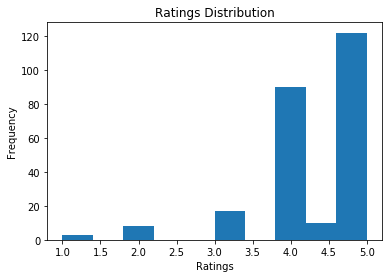

In [3]:
import matplotlib.pyplot as plt
plt.hist(ratings)
plt.title("Ratings Distribution")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.show()

We need to clean up the format of the review texts.

In [4]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

cleaned_review_text=''
for review in reviews:
  ## HTML Tags removal
  clean1=BeautifulSoup(review)  
  
  ## Non-letter characters removal
  clean2=re.sub("[^a-zA-Z]", " ", clean1.get_text()) 
  
  ## Converting to lower case and splitting each word
  clean3=clean2.lower().split()
  
  ## Removing stopwords
  stops = set(stopwords.words("english"))
  clean4=[w for w in clean3 if not w in stops]
  
  ## Returning the reviews with spaces between words
  clean_review=" ".join(clean4)
  cleaned_review_text+=(" "+clean_review)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Based on the words that appear in the all the reviews in totality, this is how they feature for Antico Pizza.

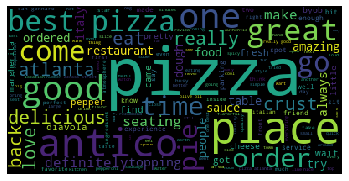

In [5]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(cleaned_review_text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Oops, the word Pizza dominates. No surprise!

Let's get the word out and see what happens.

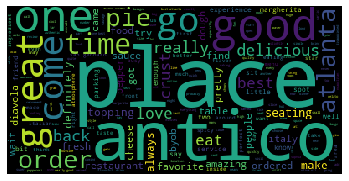

In [6]:
text_wo_pizza="".join(cleaned_review_text.split('pizza'))
wordcloud = WordCloud().generate(text_wo_pizza)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Let's put a cap on the font size to let other words shine a bit more.

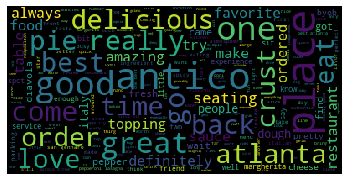

In [7]:
wordcloud = WordCloud(max_font_size=50).generate(text_wo_pizza)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()